Project Euler - Problem 200
https://projecteuler.net/problem=300 

In a very simplified form, we can consider proteins as strings consisting of hydrophobic (H) and polar (P) elements, e.g. HHPPHHHPHHPH.
For this problem, the orientation of a protein is important; e.g. HPP is considered distinct from PPH. Thus, there are 2n distinct proteins consisting of n elements.
When one encounters these strings in nature, they are always folded in such a way that the number of H-H contact points is as large as possible, since this is energetically advantageous.
As a result, the H-elements tend to accumulate in the inner part, with the P-elements on the outside.
Natural proteins are folded in three dimensions of course, but we will only consider protein folding in two dimensions.
The figure below shows two possible ways that our example protein could be folded (H-H contact points are shown with red dots).

 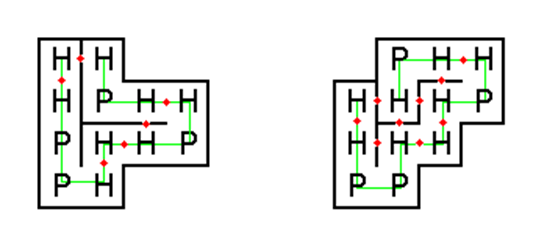

The folding on the left has only six H-H contact points, thus it would never occur naturally.
On the other hand, the folding on the right has nine H-H contact points, which is optimal for this string.
Assuming that H and P elements are equally likely to occur in any position along the string, the average number of H-H contact points in an optimal folding of a random protein string of length 8 turns out to be 850/2^8=3.3203125.
What is the average number of H-H contact points in an optimal folding of a random protein string of length 15?
Give your answer using as many decimal places as necessary for an exact result.


In [48]:
def contains_duplicate(l):
    for i in range(len(l)):
        if l[i] in l[:i]:
            return True
    return False

In [49]:
def add_to_list(l):
    ls = []
    a = l[-1]
    for i in range(4):
        if i == 0:
            candidate = l + [(a[0], a[1]+1)]
            # ls.append(L+[(a[0],a[1]+1)])
            if contains_duplicate(candidate) == False:
                ls.append(candidate)
            if len(l) == 1:
                return ls
        if i == 1:
            candidate = l+[(a[0],a[1]-1)]
            # ls.append(L+[(a[0],a[1]-1)])
            if contains_duplicate(candidate) == False:
                ls.append(candidate)
        if i == 2:
            candidate = l + [(a[0]+1,a[1])]
            # ls.append(L+[(a[0]+1,a[1])])
            if contains_duplicate(candidate) == False:
                ls.append(candidate)
        if i == 3:
            candidate = l+[(a[0]-1,a[1])]
            # ls.append(L+[(a[0]-1,a[1])])
            if contains_duplicate(candidate) == False:
                ls.append(candidate)
    return ls

def dist(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**.5

def elem_lists(n):
    if n == 1:
        return [['H'],['P']]
    p = elem_lists(n-1)
    ph = [pe + ['H'] for pe in p] 
    pp = [pe + ['P'] for pe in p]
    return pp + ph

def calc_distances(L):
    o = []
    for i in range(len(L)):
        for j in range(i,len(L)):
            if i == j:
                continue
            d = dist(L[i],L[j])
            if d == 1:
                o.append((i,j))
    return o

def elem_contact_points(o,le):
    n = 0
    for i in range(len(o)):
        if le[o[i][0]] != 'H':
            continue
        if le[o[i][0]] == le[o[i][1]]:
            n += 1
    return n

In [50]:
"""
L = [(0,0)]
Ls = add_to_list(L)
print(Ls)
def add_to_list2(Ls):
    Ls2 = []
    for i in range(len(Ls)):
        Ls2 += add_to_list(Ls[i])
    return Ls2

list4 = add_to_list2(add_to_list2(Ls))

bad_lists=[]
for i in range(len(list4)):
    if contains_duplicate(list4[i]):
        bad_lists.append(i)
        #print(i,list4[i])

list4 = [list4[i] for i in range(len(list4)) if i not in bad_lists]
print(list4)
#print(calc_distances(list4[0]))
for l in list4:
    #print(len(calc_distances(l)))
    print(elem_contact_points(calc_distances(l),['H','P','H','H']))
print(elem_lists(3))
"""

"\nL = [(0,0)]\nLs = add_to_list(L)\nprint(Ls)\ndef add_to_list2(Ls):\n    Ls2 = []\n    for i in range(len(Ls)):\n        Ls2 += add_to_list(Ls[i])\n    return Ls2\n\nlist4 = add_to_list2(add_to_list2(Ls))\n\nbad_lists=[]\nfor i in range(len(list4)):\n    if contains_duplicate(list4[i]):\n        bad_lists.append(i)\n        #print(i,list4[i])\n\nlist4 = [list4[i] for i in range(len(list4)) if i not in bad_lists]\nprint(list4)\n#print(calc_distances(list4[0]))\nfor l in list4:\n    #print(len(calc_distances(l)))\n    print(elem_contact_points(calc_distances(l),['H','P','H','H']))\nprint(elem_lists(3))\n"

In [51]:
def good_lists(n):
    ls = add_to_list(L)

    for i in range(n-2):
        ls = add_to_list2(ls)

    bad_lists=[]
    for i in range(len(ls)):
        if contains_duplicate(ls[i]):
            bad_lists.append(i)
            #print(i,list4[i])

    ls = [ls[i] for i in range(len(ls)) if i not in bad_lists]

    return ls

def optimal_sol(n):
    el = elem_lists(n)
    gl = good_lists(n)

    max_sols = []
    for e in el:
        max_sol = 0
        for l in gl:
            sol = elem_contact_points(calc_distances(l),e)
            if sol > max_sol:
                max_sol = sol
        max_sols.append(max_sol)
    return max_sols

In [ ]:
N=8
for N in range(2,16):
    sos = sum(optimal_sol(N))
    print(N,sos,sos/(2**N))

2 1 0.25
3 4 0.5
4 16 1.0
5 46 1.4375
6 133 2.078125
7 335 2.6171875
8 850 3.3203125
9 1997 3.900390625
10 4733 4.6220703125
11 10748 5.248046875
12 24555 5.994873046875
13 54372 6.63720703125
